In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data = pd.read_csv('campus_crime.csv')

Story idea 1: How many institutions have a total number of crimes reports above average? Who are they?

In [106]:
data["total_count"] = data["murder"] + data["manslaughter"] + data["forcible"]\
  + data["nonforce"] + data["robbery"] + data["agg_aslt"] + data["burglary"] + data['vehicle'] + data["arson"]

data["all_count"]=sum(data["total_count"])

data["mean"]=data["all_count"]/len(data)

bigger_data = data[data["total_count"] > data["mean"]]

print len(bigger_data)

print bigger_data 

93
                                              instname  total_enr  murder  \
1                             Arizona State University     289016       0   
5                                Ball State University      44294       0   
6                                    Boston University      64878       0   
9       California State Polytechnic University-Pomona      21107       0   
10                  California State University-Fresno      21981       0   
14              California State University-Northridge      36911       0   
40                                   Drexel University     149160       0   
48                         Florida Atlantic University     233968       0   
49                    Florida International University      44616       0   
51                            Florida State University      41087       0   
52                                 Fresno City College      40270       0   
56                        George Washington University     202080       0

There are 93 out of 228 institutions (less than 41 percent) that have a total number of crimes reports above average. Further investigation could be conducted to explain why some institutions have high frequencies of crimes. 

Story idea 2: What are the most and the least common type of crimes?

In [149]:
total_type = {"murder": sum(data["murder"]), "manslaughter": sum(data["manslaughter"]),
              "forcible": sum(data["forcible"]), "nonforce": sum(data["nonforce"]),
              "robbery": sum(data["robbery"]), "agg_aslt": sum(data["agg_aslt"]),
              "burglary": sum(data["burglary"]), "vehicle": sum(data["vehicle"]), 
              "arson": sum(data["arson"])}

sorted(total_type, reverse=True)

['vehicle',
 'robbery',
 'nonforce',
 'murder',
 'manslaughter',
 'forcible',
 'burglary',
 'arson',
 'agg_aslt']

"Vehicle" is the most common type of crimes and aggravated assault is the least common type of crimes in the listed institutions. How school police departments prevent and deal with the happening of different crimes is an interesting area to look into.

Story idea 3: Is there a connection between the number of total enrollment students, the number of personal crimes and the number of property crimes?

Here I defined "robbery" as a personal crime since it might involve violence against a person.

In [190]:
data["personal_crime"]= data["murder"] + data["manslaughter"] + data["forcible"] + data["nonforce"] + data["robbery"] + data["agg_aslt"]
data["property_crime"] = data["burglary"] + data['vehicle'] + data["arson"]

print data

                                              instname  total_enr  murder  \
0                               American River College      95250       0   
1                             Arizona State University     289016       0   
2                                   Ashford University      74596       0   
3                                    Auburn University      25469       0   
4                    Austin Community College District    1082400       0   
5                                Ball State University      44294       0   
6                                    Boston University      64878       0   
7                       Brigham Young University-Provo     170505       0   
8                                      Broward College     379782       0   
9       California State Polytechnic University-Pomona      21107       0   
10                  California State University-Fresno      21981       0   
11               California State University-Fullerton     144624       0   

In [225]:
data["personal_mean"]= (sum(data["murder"]) + sum(data["manslaughter"]) + sum(data["forcible"]) + sum(data["nonforce"]) + sum(data["robbery"]) + sum(data["agg_aslt"]))/len(data)
data["property_mean"]=(sum(data["burglary"])+ sum(data['vehicle']) + sum(data["arson"]))/len(data)

print data["personal_mean"], data["property_mean"]

0      8
1      8
2      8
3      8
4      8
5      8
6      8
7      8
8      8
9      8
10     8
11     8
12     8
13     8
14     8
15     8
16     8
17     8
18     8
19     8
20     8
21     8
22     8
23     8
24     8
25     8
26     8
27     8
28     8
29     8
      ..
198    8
199    8
200    8
201    8
202    8
203    8
204    8
205    8
206    8
207    8
208    8
209    8
210    8
211    8
212    8
213    8
214    8
215    8
216    8
217    8
218    8
219    8
220    8
221    8
222    8
223    8
224    8
225    8
226    8
227    8
Name: personal_mean, Length: 228, dtype: int64 0      30
1      30
2      30
3      30
4      30
5      30
6      30
7      30
8      30
9      30
10     30
11     30
12     30
13     30
14     30
15     30
16     30
17     30
18     30
19     30
20     30
21     30
22     30
23     30
24     30
25     30
26     30
27     30
28     30
29     30
       ..
198    30
199    30
200    30
201    30
202    30
203    30
204    30
205    30
206    30
207 

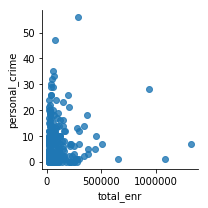

In [199]:
g = sns.FacetGrid(data)

g.map(plt.scatter, "total_enr", "personal_crime", alpha=.8)

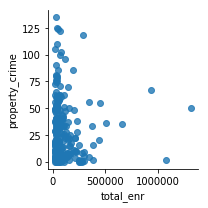

In [200]:
g = sns.FacetGrid(data)

g.map(plt.scatter, "total_enr", "property_crime", alpha=.8)

There does not seem to be a relationship between the number of total enrollment students and the number of personal crimes or the number of property crimes.

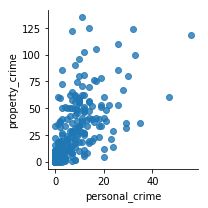

In [218]:
g = sns.FacetGrid(data)

g.map(plt.scatter, "personal_crime", "property_crime", alpha=.8)

#sns.regplot(x="personal_crime", y="property_crime", data=data, scatter=True, ax=g.axes[0, 0])

Overall, there seems to be a connection between the number of personal crimes and the number of property crimes, but the relationship is not strong.

Further I noticed for some institutions with a small number of personal crimes, there is a big number of property crimes, and vice versa. Here I used a filter to get their data. Although the numbers I choose as the boundaries is not scientific enough and need more consideration, it shows some potential here.

In [233]:
data[(data.personal_crime < 10) & (data.property_crime > 100)].sort_values('total_count')

,instname,total_enr,murder,manslaughter,forcible,nonforce,robbery,agg_aslt,burglary,vehicle,arson,total_count,all_count,mean,total_murder,personal_crime,property_crime,personal_mean,property_mean
209,University of Toledo,67830,0,0,2,0,1,4,118,0,4,129,8903,39.048246,5,7,122,8,30


In [234]:
data[(data.personal_crime > 30) & (data.property_crime < 50)].sort_values('total_count')

,instname,total_enr,murder,manslaughter,forcible,nonforce,robbery,agg_aslt,burglary,vehicle,arson,total_count,all_count,mean,total_murder,personal_crime,property_crime,personal_mean,property_mean
107,Ohio State University-Main Campus,56867,0,0,28,0,7,0,22,8,6,71,8903,39.048246,5,35,36,8,30


With a small number of personal crimes and a big number of property crimes, is that because a lax regulation in campus properties? With a big number of personal crimes and a relatively small number of property crimes, does that illustrate an unfriendly campus environment among students and staff? What contributed to the above findings may be further examined.